In [524]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [525]:
# reading csv and the sahpe of it
trans_df=pd.read_csv('C:/Users/Dear User classic/Downloads/Compressed/K24-Data-Engineering-Challenge/sales_data.csv')
trans_df.shape

(2574, 5)

In [526]:
# the first 10 rows of dataframe
trans_df.head(10)


,TransactionID,ProductID,Quantity,SalePrice,PurchasePrice
0,1,1124.0,5.0,13.38,9.91
1,2,1146.0,14.0,26.88,25.60
2,3,1128.0,8.0,15.89,13.24
3,4,1101.0,8.0,2.9,2.42
4,5,1112.0,2.0,7.23,4.82
5,6,1133.0,12.0,17.21,16.39
6,7,1110.0,10.0,9.83,8.94
7,8,1105.0,3.0,4.29,2.96
8,9,1124.0,2.0,14.87,9.91
9,10,1125.0,9.0,17.8,14.83


# Cleaning dataset

null handle

In [527]:
# chencking for null
print(type(trans_df['SalePrice']))
trans_df[trans_df.isnull().any(axis=1)]

<class 'pandas.core.series.Series'>


,TransactionID,ProductID,Quantity,SalePrice,PurchasePrice
471,470,1130.0,NaN,35.49,28.39
2011,2008,1133.0,11.0,NaN,16.39
2060,2057,NaN,9.0,32.65,28.39


In [528]:
# handle null value in ProductID column

'''
about null in product ID I chack for same perchase price to replace
    if we have just one ProductID for it
''' 
print(trans_df[trans_df['PurchasePrice'] == 28.39 ])

# replace null value in ProductID column
trans_df['ProductID'].fillna(1130.0,inplace= True)



      TransactionID  ProductID  Quantity SalePrice  PurchasePrice
340             339     1130.0      13.0     29.81          28.39
364             363     1130.0      19.0     29.81          28.39
431             430     1130.0      15.0     29.81          28.39
471             470     1130.0       NaN     35.49          28.39
936             935     1130.0      20.0     29.81          28.39
1081           1080     1130.0      10.0     31.23          28.39
1109           1108     1130.0       8.0     34.07          28.39
1174           1172     1130.0       5.0     38.33          28.39
1402           1400     1130.0       8.0     34.07          28.39
1436           1434     1130.0       1.0        44          28.39
1733           1731     1130.0       9.0     32.65          28.39
1790           1788     1130.0      19.0     29.81          28.39
1817           1815     1130.0       6.0     36.91          28.39
2060           2057        NaN       9.0     32.65          28.39
2102      

In [529]:
# replace null value in Quantity column

print(trans_df[trans_df['ProductID'] == 1130.0 ])

'''
after checking data, I figured out the SalePrice is increased with increasing
    Quantity. then after checking according this fact the null in Quantity column is '7'
'''

# replace null with number 7.0

trans_df['Quantity'].fillna(7.0,inplace= True)

      TransactionID  ProductID  Quantity SalePrice  PurchasePrice
340             339     1130.0      13.0     29.81          28.39
364             363     1130.0      19.0     29.81          28.39
431             430     1130.0      15.0     29.81          28.39
471             470     1130.0       NaN     35.49          28.39
936             935     1130.0      20.0     29.81          28.39
1081           1080     1130.0      10.0     31.23          28.39
1109           1108     1130.0       8.0     34.07          28.39
1174           1172     1130.0       5.0     38.33          28.39
1402           1400     1130.0       8.0     34.07          28.39
1436           1434     1130.0       1.0        44          28.39
1733           1731     1130.0       9.0     32.65          28.39
1790           1788     1130.0      19.0     29.81          28.39
1817           1815     1130.0       6.0     36.91          28.39
2060           2057     1130.0       9.0     32.65          28.39
2102      

In [530]:
# replace null value in SalePrice column
print(trans_df[trans_df['ProductID'] == 1133.0 ])
'''
according to data, for a ProductID when Quantity is Same then SalePrice is same too
'''
trans_df['SalePrice'].fillna('17.21',inplace= True)

      TransactionID  ProductID  Quantity SalePrice  PurchasePrice
5                 6     1133.0      12.0     17.21          16.39
46               47     1133.0       8.0     19.67          16.39
119             120     1133.0       9.0     18.85          16.39
282             281     1133.0       6.0     21.31          16.39
398             397     1133.0       4.0     22.95          16.39
507             506     1133.0       2.0     24.59          16.39
525             524     1133.0      12.0     17.21          16.39
537             536     1133.0       8.0     19.67          16.39
551             550     1133.0       8.0     19.67          16.39
585             584     1133.0       7.0     20.49          16.39
590             589     1133.0       8.0     19.67          16.39
707             706     1133.0      10.0     18.03          16.39
739             738     1133.0      10.0     18.03          16.39
781             780     1133.0      10.0     18.03          16.39
868       

In [531]:
# checking data type for all columns 
trans_df.dtypes

TransactionID      int64
ProductID        float64
Quantity         float64
SalePrice         object
PurchasePrice    float64
dtype: object

In [532]:
# convert SalePrice data type to float64

# convert '-' to NaN
trans_df['SalePrice'] = trans_df['SalePrice'].replace('-', np.nan)

trans_df['SalePrice'] = trans_df['SalePrice'].astype(float)
# checking data type for all columns 
trans_df.dtypes

TransactionID      int64
ProductID        float64
Quantity         float64
SalePrice        float64
PurchasePrice    float64
dtype: object

In [533]:
trans_df[trans_df.isnull().any(axis=1)]

,TransactionID,ProductID,Quantity,SalePrice,PurchasePrice
2573,2570,1190.0,5.0,NaN,6.1


In [534]:
# for replacing null in Sales Price I use average of  1 PurchaesePrice before and 1 after that with the same Quantity
sort_trans = trans_df[(trans_df['PurchasePrice']  >5.6)&(trans_df['PurchasePrice']  <6.8)
                      &(trans_df['Quantity']  ==5)].sort_values(by='PurchasePrice').head(3)
mean_replacement = sort_trans['SalePrice'].mean()

trans_df['SalePrice'].fillna(mean_replacement,inplace= True)


duplicate handle

In [535]:
'''
in dataset we have 2574 records but 2570 'TransactionID' 
    then check it for duplicate
'''
duplicated_rows = trans_df[trans_df.duplicated(subset=['TransactionID'], keep=False)]
duplicated_rows

,TransactionID,ProductID,Quantity,SalePrice,PurchasePrice
229,230,1110.0,6.0,11.62,8.94
230,230,1110.0,6.0,11.62,8.94
272,272,1126.0,9.0,9.53,8.29
273,272,1126.0,9.0,9.53,8.29
1153,1152,1101.0,10.0,2.66,2.42
1154,1152,1101.0,10.0,2.66,2.42
1973,1971,1112.0,9.0,5.54,4.82
1974,1971,1112.0,9.0,5.54,4.82


In [536]:
#remove duplcates
trans_df=trans_df.drop_duplicates(subset=['TransactionID'])


negative values 
    # in transaction data all values must be positive

In [548]:
# check for negetive values

for column in trans_df.columns:
    print(column)
    for i,j in enumerate(trans_df[column]):
        if j<0:
            print(j)

TransactionID
ProductID
Quantity
SalePrice
PurchasePrice


In [538]:
# Replace negative numbers with their absolute values 
for column in trans_df.columns:
    trans_df[column] = trans_df[column].apply(lambda x: abs(x) if x < 0 else x)

In [539]:
len(trans_df['ProductID'].unique())

52

### analyze the relation between Sale Price and Quantity for ProductID '1100' and '1101'

groupby data based on productID 

In [540]:
trans_df.groupby(['ProductID','TransactionID']).sum()

Quantity  SalePrice  PurchasePrice
ProductID TransactionID                                      
1100.0    24                   24.0       2.10           2.00
          180                  13.0       2.10           2.00
          213                  31.0       2.10           2.00
          217                  12.0       2.10           2.00
          235                  12.0       2.10           2.00
          282                  18.0       2.10           2.00
          296                  17.0       2.10           2.00
          343                  12.0       2.10           2.00
          400                   2.0       3.00           2.00
          404                  21.0       2.10           2.00
          440                  22.0       2.10           2.00
          462                  24.0       2.10           2.00
          496                   6.0       2.60           2.00
          574                   3.0       2.90           2.00
          577                  19.0       2.10           2.00
          586                  19.0       2.10           2.00
          588                  13.0       2.10           2.00
          600                  27.0       2.10           2.00
          623                  18.0       2.10           2.00
          632                  27.0       2.10           2.00
          664                  14.0       2.10           2.00
          766                  12.0       2.10           2.00
          859                  12.0       2.10           2.00
          876                   6.0       2.60           2.00
          968                  25.0       2.10           2.00
          1027                 15.0       2.10           2.00
          1042                  4.0       2.80           2.00
          1044                  9.0       2.30           2.00
          1178                 14.0       2.10           2.00
          1248                 11.0       2.10           2.00
          1256                 20.0       2.10           2.00
          1340                 22.0       2.10           2.00
          1373                 30.0       2.10           2.00
          1377                 18.0       2.10           2.00
          1457                 12.0       2.10           2.00
          1486                 16.0       2.10           2.00
          1546                 24.0       2.10           2.00
          1547                 30.0       2.10           2.00
          1567                  8.0       2.40           2.00
          1630                  8.0       2.40           2.00
          1655                 22.0       2.10           2.00
          1671                  4.0       2.80           2.00
          1705                 19.0       2.10           2.00
          1712                 27.0       2.10           2.00
          1769                 28.0       2.10           2.00
          1798                  7.0       2.50           2.00
          1840                 27.0       2.10           2.00
          1914                  5.0       2.70           2.00
          1944                 18.0       2.10           2.00
          2006                  4.0       2.80           2.00
          2065                 13.0       2.10           2.00
          2074                  7.0       2.50           2.00
          2185                  8.0       2.40           2.00
          2229                  9.0       2.30           2.00
          2256                  2.0       3.00           2.00
          2263                 26.0       2.10           2.00
          2282                 28.0       2.10           2.00
          2319                 12.0       2.10           2.00
          2339                 31.0       2.10           2.00
          2566                  4.0       2.80           2.00
1101.0    4                     8.0       2.90           2.42
          82                    4.0       3.39           2.42
          87                    2.0       3.63           2.

In [541]:
#correlation of data for all records
trans_df[['Quantity','SalePrice']].corr()

,Quantity,SalePrice
Quantity,1.000000,0.010172
SalePrice,0.010172,1.000000


In [542]:
trans_df_1100 = trans_df[trans_df['ProductID']==1100.0]
trans_array_1100= trans_df_1100[['Quantity','SalePrice']].values

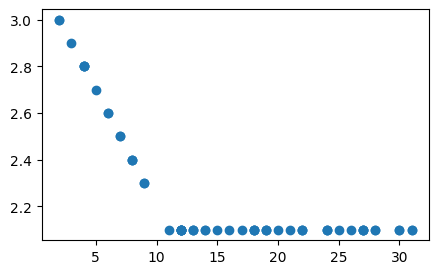

In [560]:
plt.figure(figsize=(5,3))
plt.scatter(trans_array_1100[:,0],trans_array_1100[:,1])

In [544]:
trans_df_1101 = trans_df[trans_df['ProductID']==1101.0]
trans_array_1101= trans_df_1101[['Quantity','SalePrice']].values

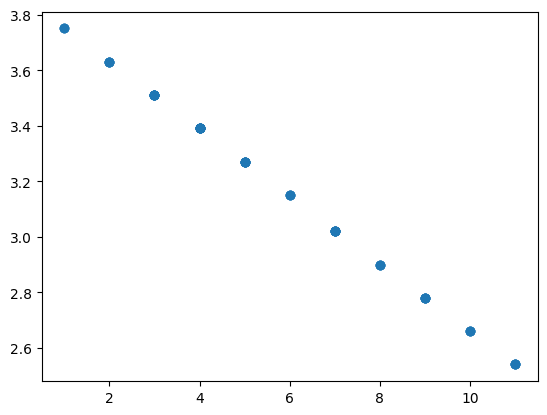

In [561]:
plt.scatter(trans_array_1101[:,0],trans_array_1101[:,1])

In [546]:
print("Correlation for ProductID 1100 :\n",np.corrcoef(trans_array_1100[:,0],trans_array_1100[:,1]),'\n\n')
print("Correlation for ProductID 1101 :\n",np.corrcoef(trans_array_1101[:,0],trans_array_1101[:,1]))

Correlation for ProductID 1100 :
 [[ 1.         -0.74476964]
 [-0.74476964  1.        ]] 


Correlation for ProductID 1101 :
 [[ 1.         -0.99997568]
 [-0.99997568  1.        ]]


'''
we can see according to the correlation and scatter plots 
    there is a strong negetive relation between them that means
        with increasing Quantity SalePrice declines
''' 

In [563]:
trans_df.to_csv('C:/Users/Dear User classic/Downloads/Compressed/K24-Data-Engineering-Challenge/sales_data_cleaned.csv',index=False)